# Objective :  California House Price Prediction 
# EDA - Python
# Insights - Patterns
#  Regression

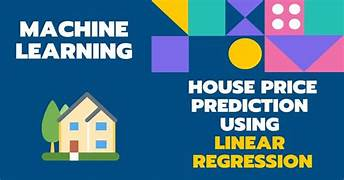

# 1. Import Python Modules

In [2]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet

from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# 2.  Load House Price Dataset

In [6]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()

# Convert features to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable to the DataFrame if needed
df['HouseVal'] = data.target
#df.to_csv("California_Housing_Price_1.csv", index=False)

print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
file_path = r"California_Housing_Price.csv"
price_df = pd.read_csv(file_path)
price_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 3. Basic Inspection on dataset

In [11]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(price_df)

top 5 rows - using head
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  HouseVal  
0    -122.23     4.526  
1    -122.22     3.585  
2    -122.24     3.521  
3    -122.25     3.413  
4    -122.25     3.422  

bottom 5 rows using tail
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0

##  Observations

1. We have 20,640 samples/observations.
2. There are 8 features/columns/variables.
3. 'HouseVal' is the target column for regression.
4. There are no missing or null values in the dataset.


# 4. Numerical - Variables - Analysis - Using -Pipeline

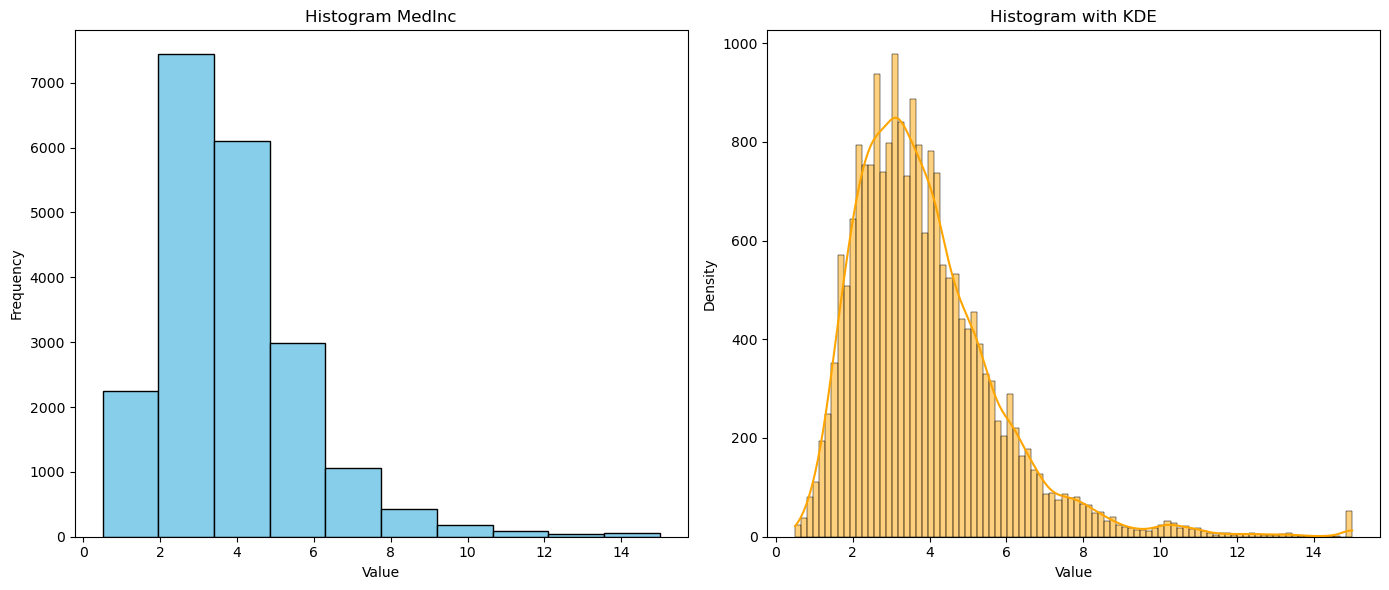

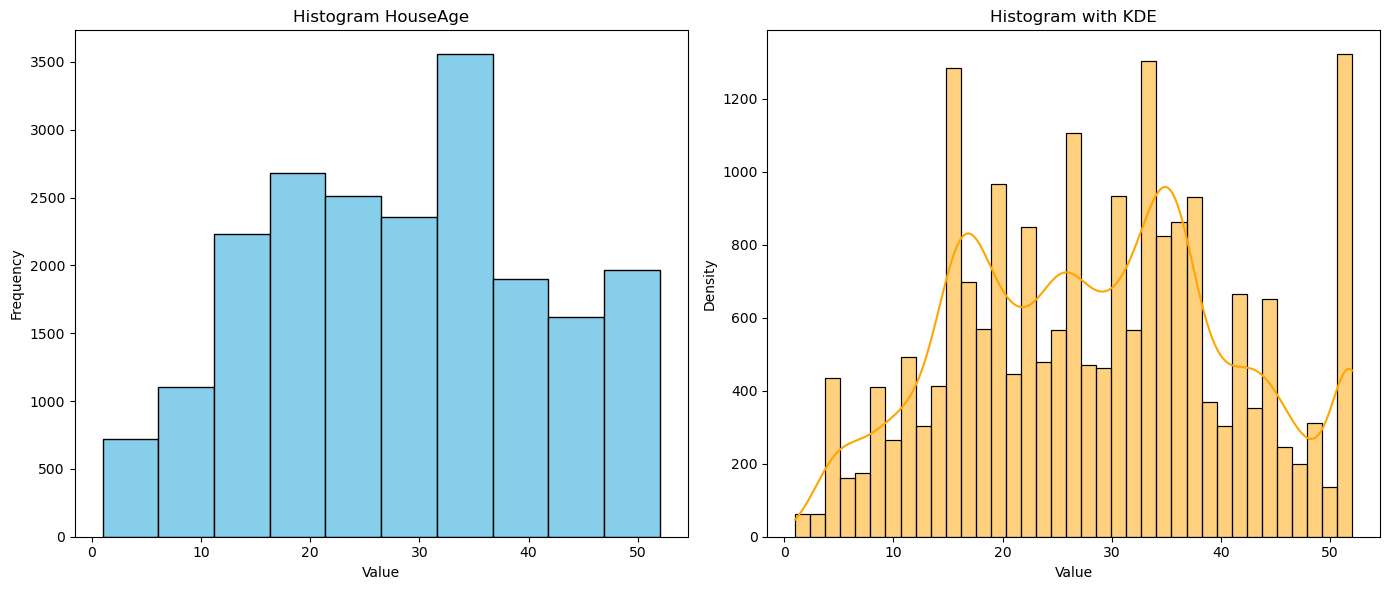

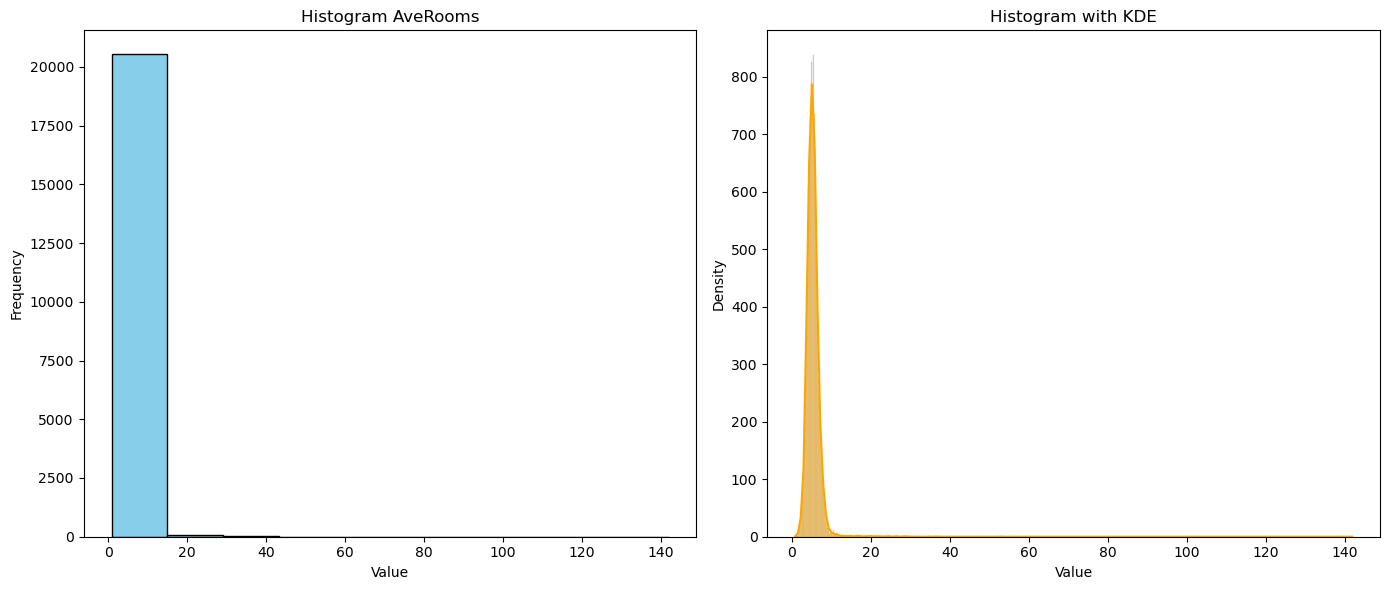

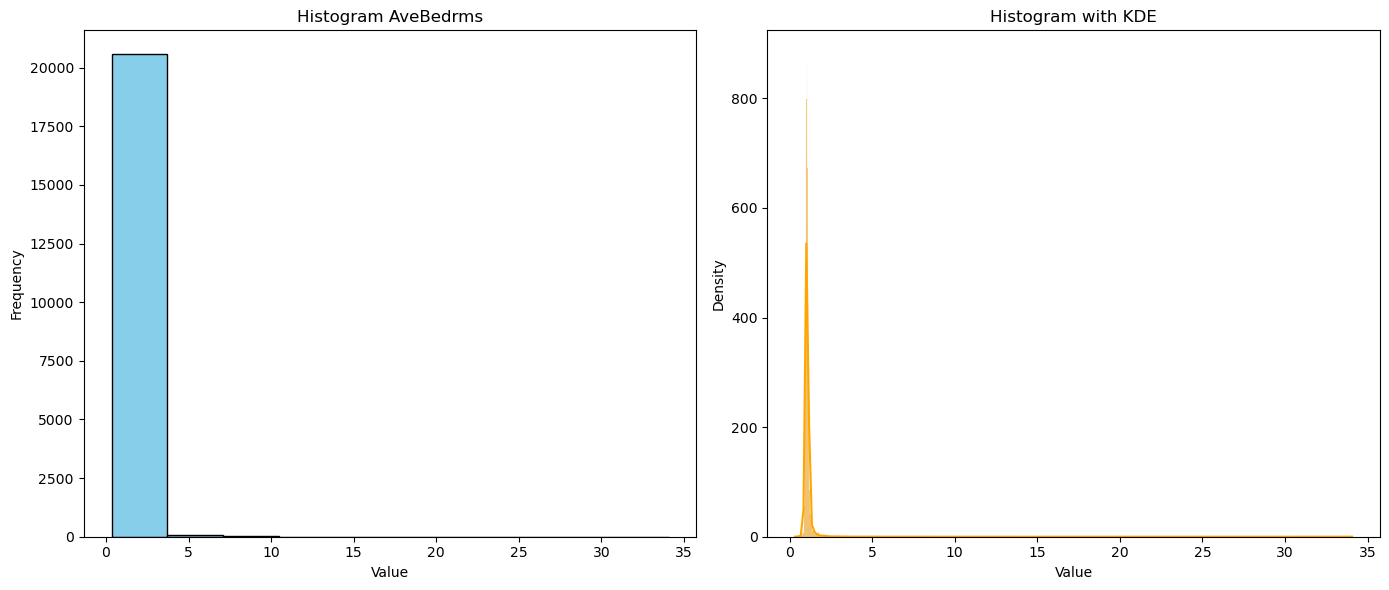

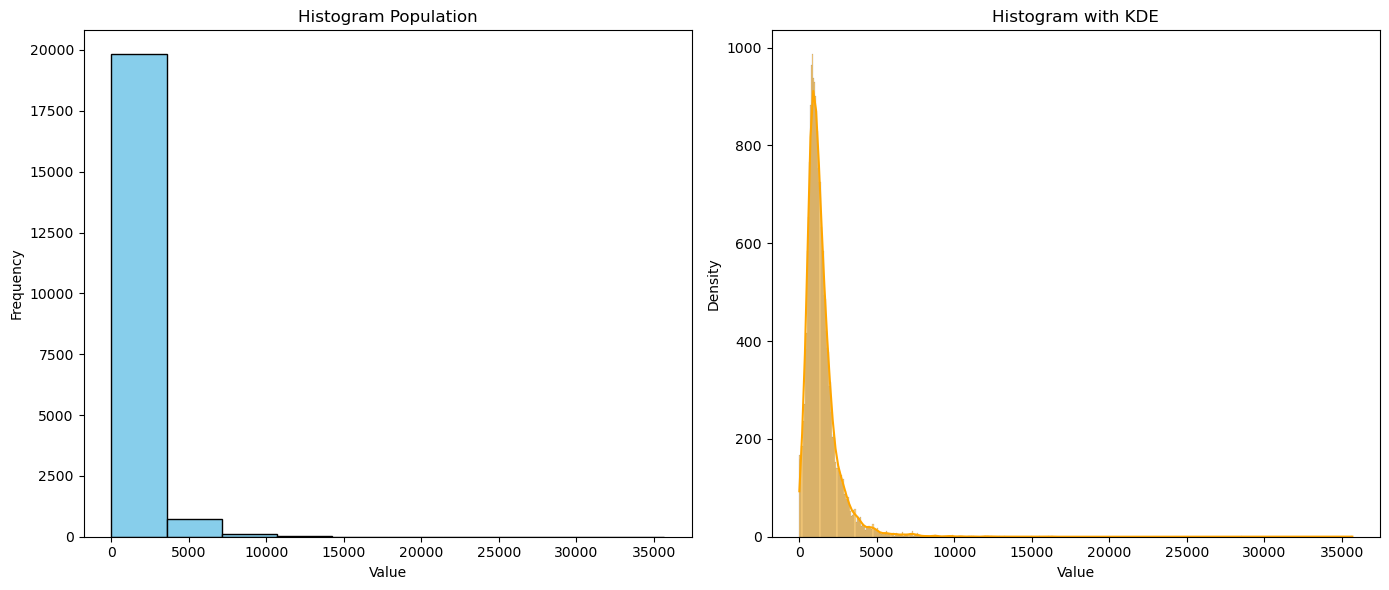

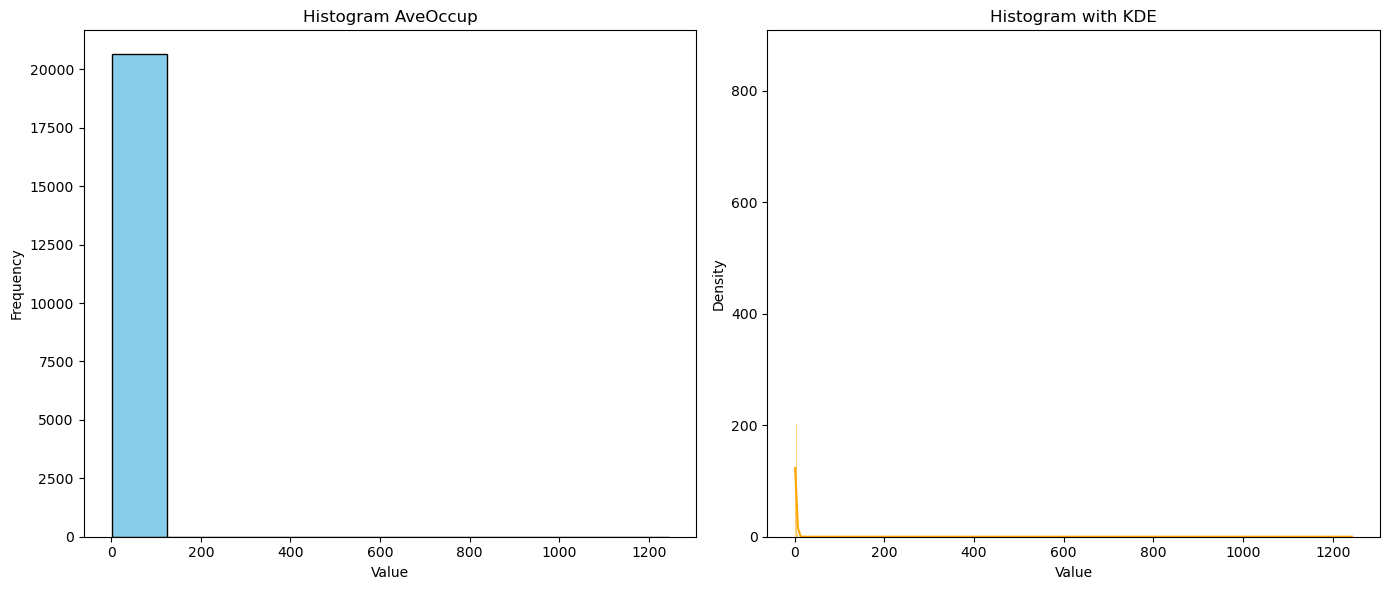

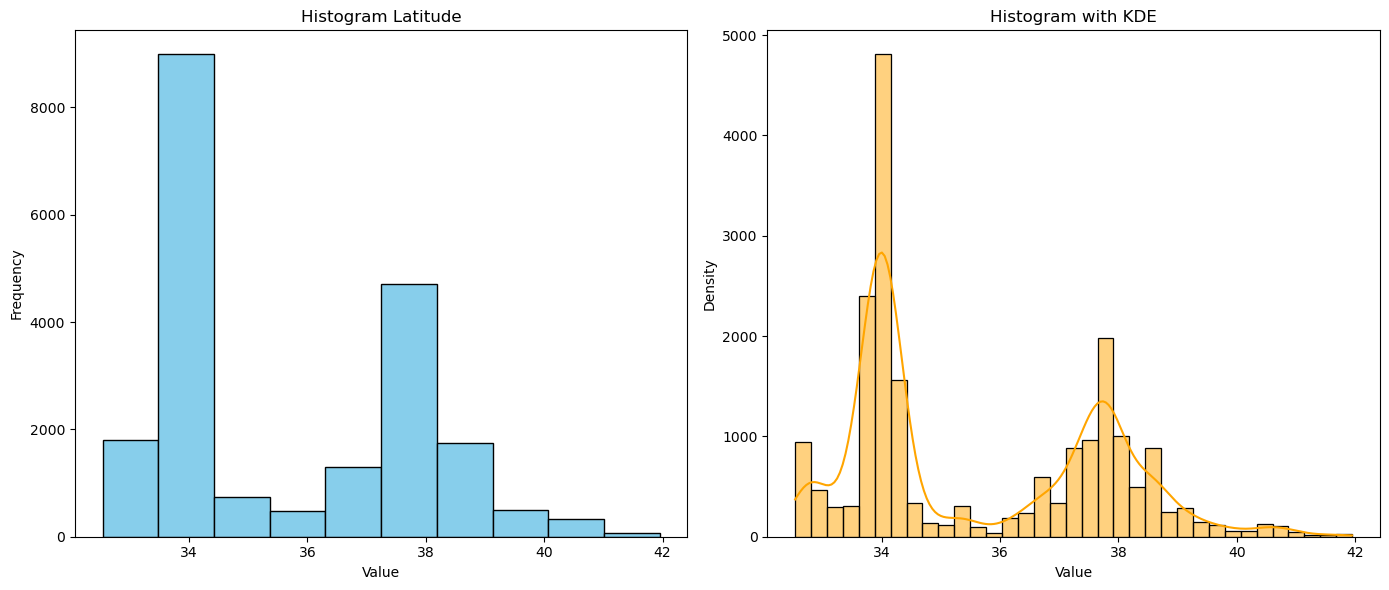

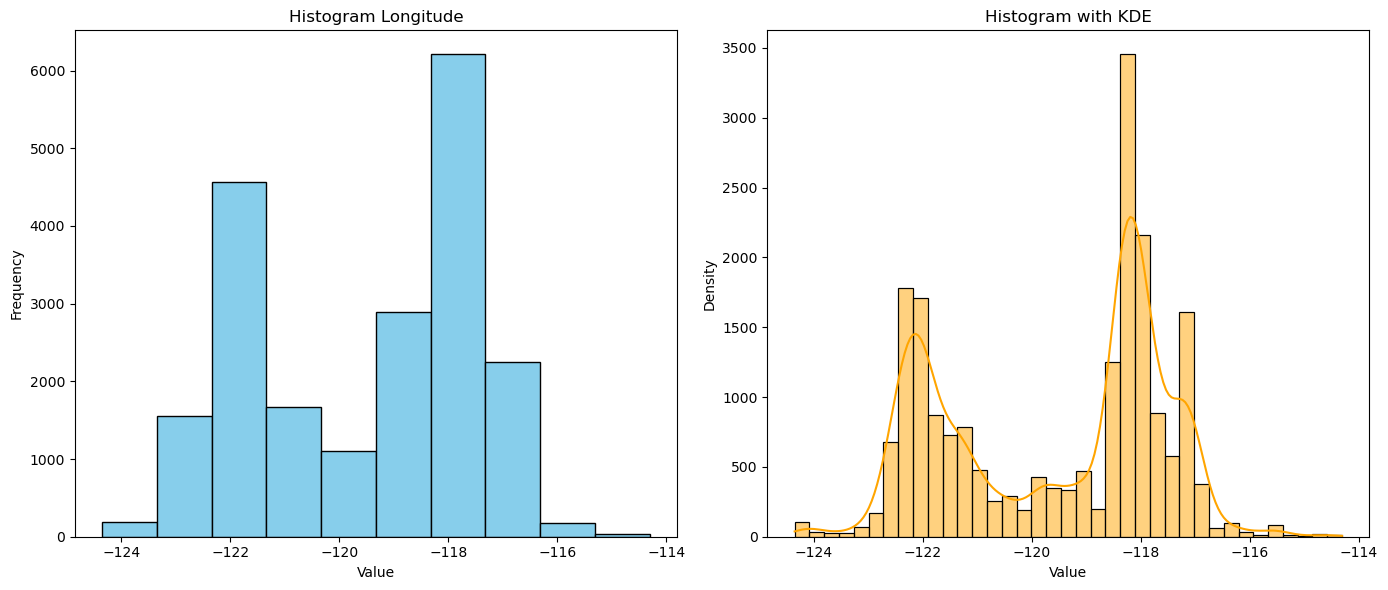

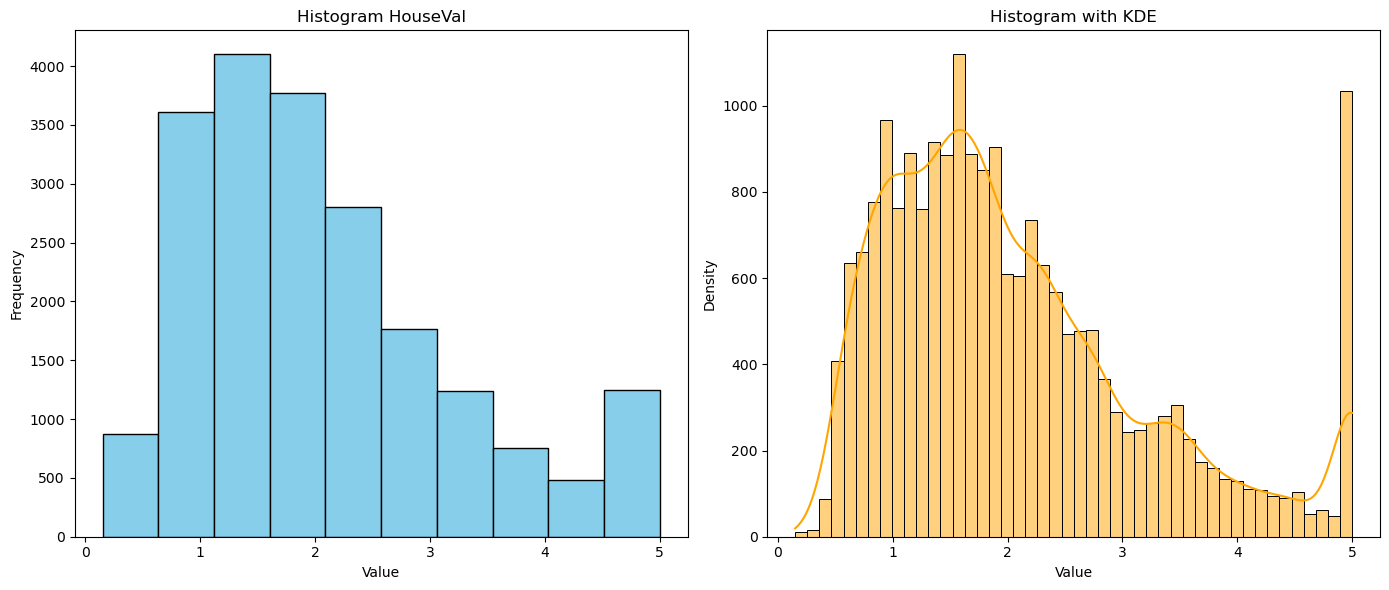

In [12]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(price_df)

## Observations
1. MedInc -  Gausian Normal distrubted
2. HouseAge - Gausian Normal distrubted bus has some peak values in between
3. AveRooms, AveBedrms, Population - These are Gausian Normal distrubted
4. Latitude, Longitude - has bi Gausian Normal distrubted
5. HouseVal - Gausian Normal distrubted

# 5. Bi Variate Analysis

In [13]:
price_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'HouseVal'],
      dtype='object')

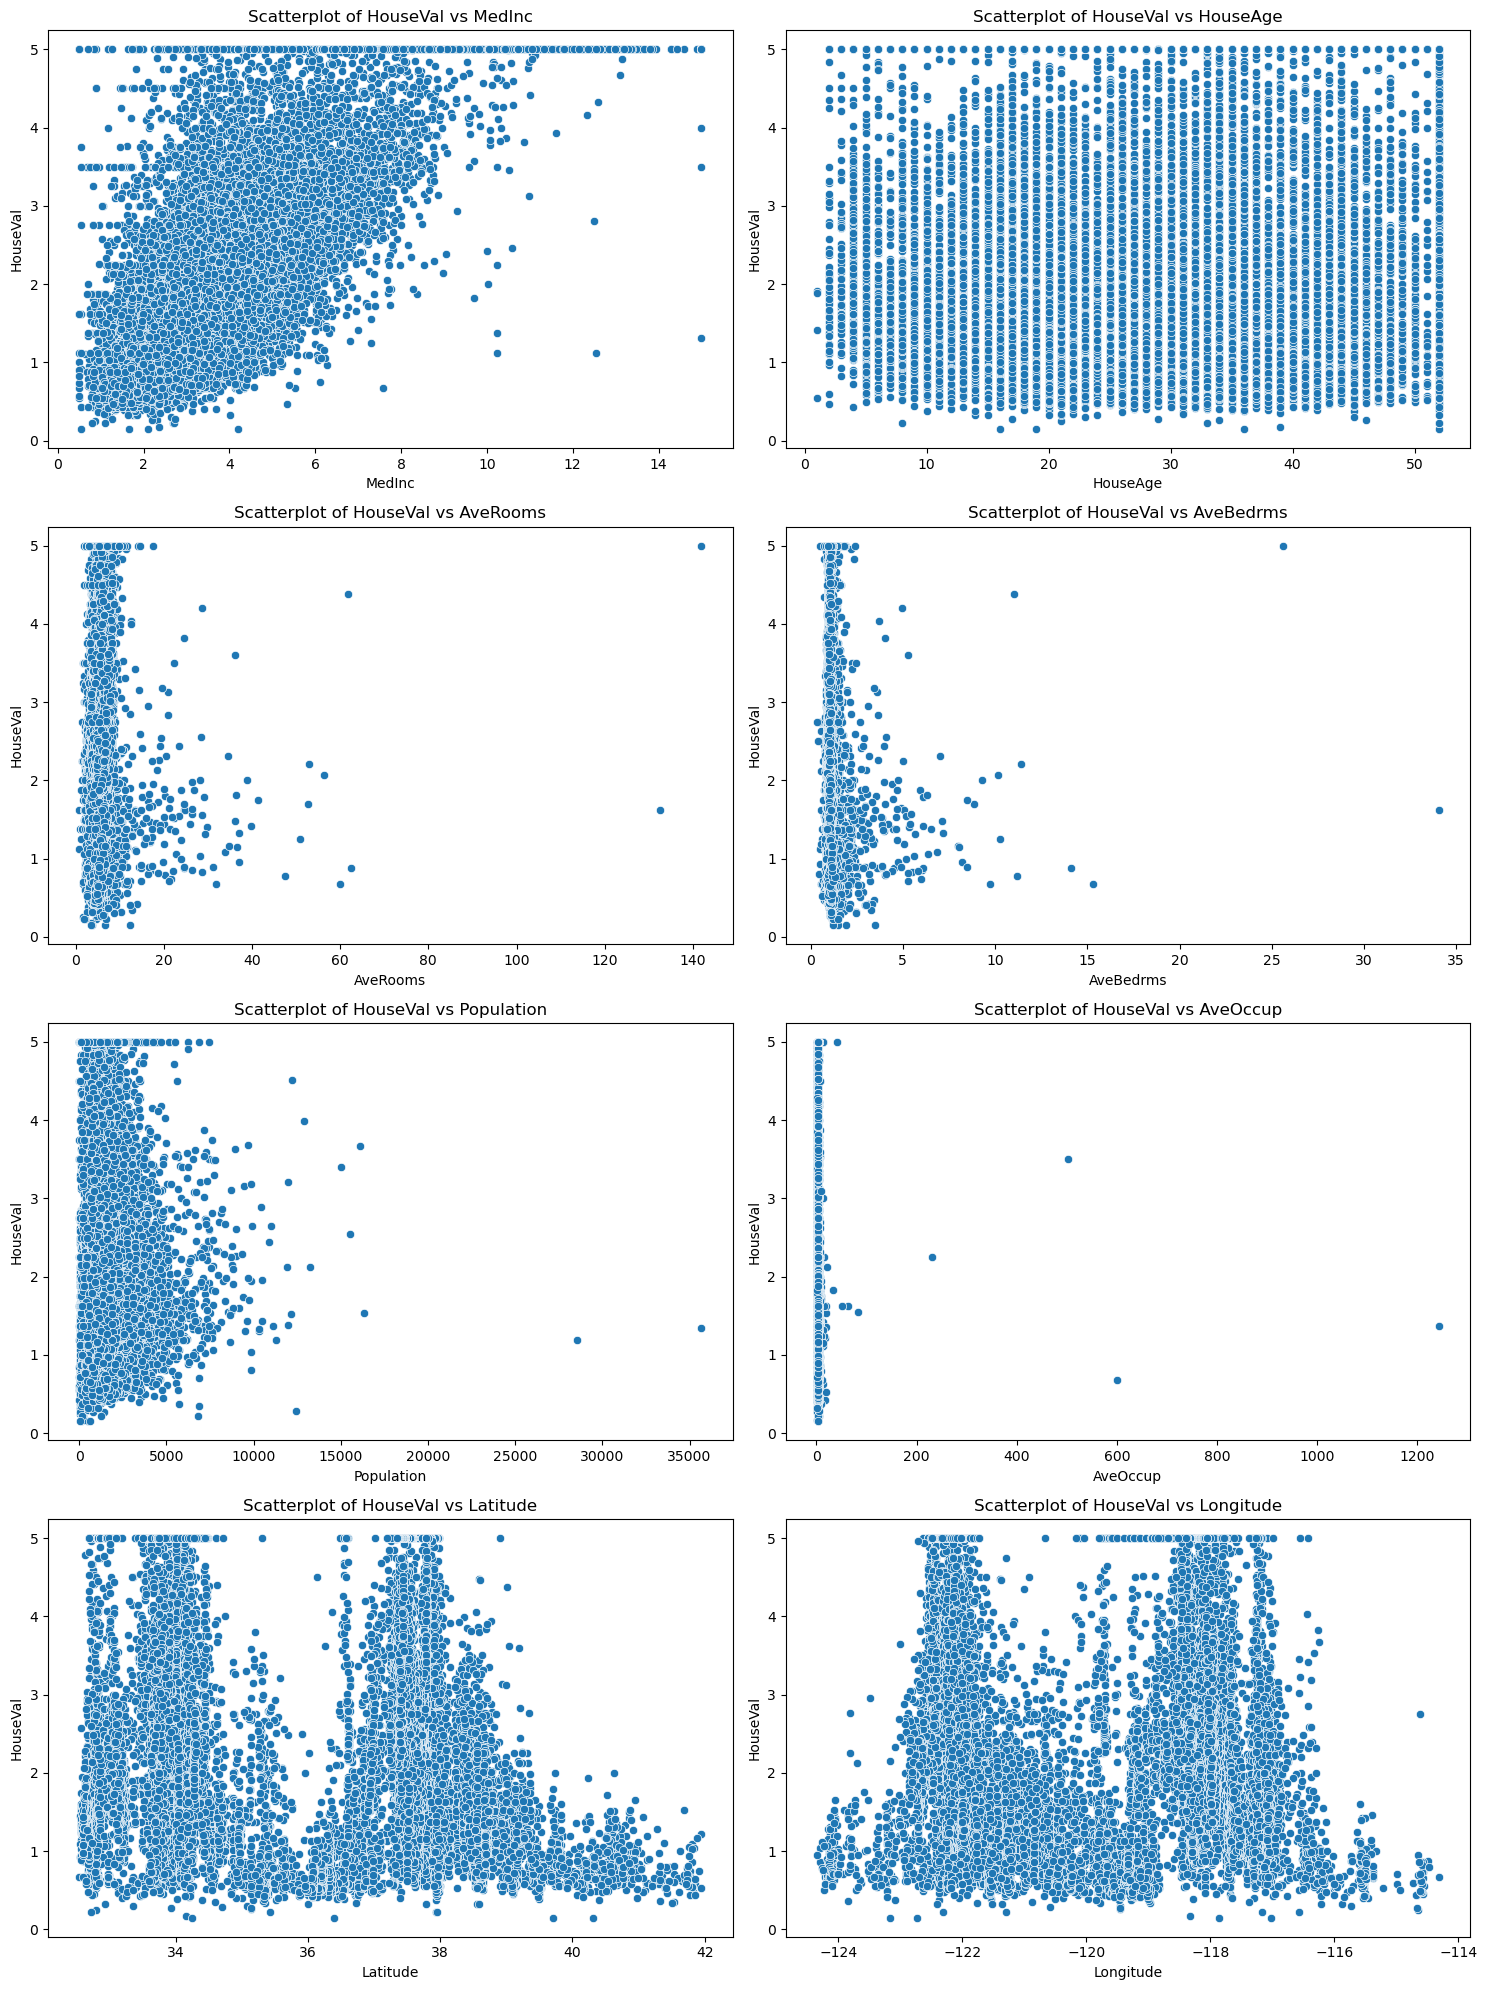

In [14]:
target = "HouseVal"
# Define the list of numerical variables
num_vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
i = 0

# Plot scatterplots for each numerical variable
for j in range(4):
    for k in range(2):
        sns.scatterplot(data=price_df, y=target, x=num_vars[i], ax=axs[j, k])
        axs[j, k].set_title(f'Scatterplot of {target} vs {num_vars[i]}')
        axs[j, k].set_xlabel(num_vars[i])
        axs[j, k].set_ylabel(target)
        i += 1

plt.tight_layout()
plt.show()

##  Correlation 

In [15]:
 price_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
HouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


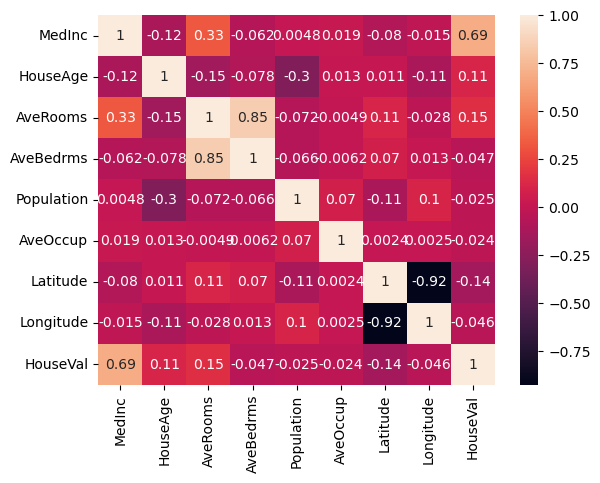

In [16]:
corr_mat=price_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

##  Observations
1. House Price is higly correlated with MedInc
2. Latitude and Longitude are highly negative correlated


# 6. VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = price_df[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

      feature       VIF
0      MedInc  3.801038
1    HouseAge  3.769898
2   AveBedrms  4.263506
3  Population  2.222516
4    AveOccup  1.094644


## Observations
1. Removed Latitude and Longitude and AveRooms (Features) - Whose VIF > 10


# 7. Inferential statistics test

In [18]:
import statsmodels.api as sm
X = sm.add_constant(price_df[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup']] )

# Fit a linear regression model
model = sm.OLS(price_df['HouseVal'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

                            OLS Regression Results                            
Dep. Variable:               HouseVal   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     4330.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:20:04   Log-Likelihood:                -24838.
No. Observations:               20640   AIC:                         4.969e+04
Df Residuals:                   20634   BIC:                         4.974e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2221      0.028     -8.022      0.0

# 8. ML Models

In [19]:
X=price_df[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup']].copy()
Y=price_df['HouseVal']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 14448
test data length: 6192


Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], dtype='object')

# 9. Linear Regression

In [21]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared

In [22]:
model_results = {}
def regression_matrix(model ,X_train,X_test,y_train,y_test, model_name):
    print("Model Name ",model_name)
    y_pred = model.predict(X_test)
    train_r2_score=round(model.score(X_train,y_train),3)
    print("train R2 Score:",train_r2_score)
    test_r2_score=round(model.score(X_test,y_test),3)
    print("Test R2 Score:",test_r2_score)
    print("Test R2 score:",r2_score(y_test,y_pred))
    
    mse = round(mean_squared_error(y_test,y_pred),3)
    print("MSE:",mse)
    rmse=round(root_mean_squared_error(y_test,y_pred),3)
    print("RMSE:",rmse)
    adj_r2_score=round(adjusted_r_squared(y_test,y_pred,len(y_test),len(X_train.columns)),3)
    print("Adj-R Score",adj_r2_score)
    
    if abs(train_r2_score - test_r2_score) > .10:
        print("model :" , model_name ,"is overfitting")
    if train_r2_score < 0.50:
        print("model :" , model_name ,"is underfitting")
    
    model_results[model_name]=[train_r2_score,test_r2_score,adj_r2_score,mse,rmse]

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

regression_matrix(lr ,X_train,X_test,y_train,y_test, "LinearReg")

columns: Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], dtype='object')
Coefficients:  [ 4.34324445e-01  1.82072514e-02  1.21728153e-02  3.17850232e-05
 -4.79297470e-03]
Intercept: -0.1777254369302308
Model Name  LinearReg
train R2 Score: 0.507
Test R2 Score: 0.524
Test R2 score: 0.5235580341380497
MSE: 0.634
RMSE: 0.796
Adj-R Score 0.523


In [24]:
lasso_reg = Lasso(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
lasso_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lasso_reg.coef_)
print('Intercept:',lasso_reg.intercept_)

regression_matrix(lasso_reg ,X_train,X_test,y_train,y_test, "Lasso")

columns: Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], dtype='object')
Coefficients:  [ 4.04845346e-01  1.68587516e-02  0.00000000e+00  2.64083936e-05
 -3.88806979e-03]
Intercept: -0.00697850736480321
Model Name  Lasso
train R2 Score: 0.504
Test R2 Score: 0.521
Test R2 score: 0.5212646939962468
MSE: 0.637
RMSE: 0.798
Adj-R Score 0.521


In [25]:
ridge_reg = Ridge(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
ridge_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', ridge_reg.coef_)
print('Intercept:',ridge_reg.intercept_)

regression_matrix(ridge_reg ,X_train,X_test,y_train,y_test, "Ridge")

columns: Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], dtype='object')
Coefficients:  [ 4.34323574e-01  1.82072307e-02  1.21721696e-02  3.17849385e-05
 -4.79297029e-03]
Intercept: -0.17772066586007407
Model Name  Ridge
train R2 Score: 0.507
Test R2 Score: 0.524
Test R2 score: 0.5235580344864108
MSE: 0.634
RMSE: 0.796
Adj-R Score 0.523


In [26]:
print("\n\n")
result=pd.DataFrame(model_results,index=["Train R2","Test R2" ,"Adj R2","MSE","RMSE"])
print(result)
print("\n\n")

print(tabulate(result, headers='keys', tablefmt='pretty'))




          LinearReg  Lasso  Ridge
Train R2      0.507  0.504  0.507
Test R2       0.524  0.521  0.524
Adj R2        0.523  0.521  0.523
MSE           0.634  0.637  0.634
RMSE          0.796  0.798  0.796



+----------+-----------+-------+-------+
|          | LinearReg | Lasso | Ridge |
+----------+-----------+-------+-------+
| Train R2 |   0.507   | 0.504 | 0.507 |
| Test R2  |   0.524   | 0.521 | 0.524 |
|  Adj R2  |   0.523   | 0.521 | 0.523 |
|   MSE    |   0.634   | 0.637 | 0.634 |
|   RMSE   |   0.796   | 0.798 | 0.796 |
+----------+-----------+-------+-------+


# 10. Save the model

In [27]:
import pickle
pickle.dump(lr, open('house-price-prediction-model.pkl', 'wb'))